In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from matplotlib import gridspec
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv("C://Users//Vijayalakshmi//Desktop//DataScience_Programs_August//Analysis//Netflix//NetflixOriginals.csv//NetflixOriginals.csv", encoding='ISO-8859-1', skiprows=6)
data1.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
data1.loc[data1['IMDB Score'] >5]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
59,Cadaver,Horror,"October 22, 2020",86,5.1,Norwegian
60,Clinical,Thriller,"January 13, 2017",104,5.1,English
61,Coffee & Kareem,Action comedy,"April 3, 2020",88,5.1,English
62,Dude,Teen comedy-drama,"April 20, 2018",97,5.1,English
63,Geez & Ann,Romantic drama,"February 25, 2021",105,5.1,Indonesian
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [4]:
data1.columns = data1.columns.str.replace(' ', '_')

In [5]:
data1['Year']=pd.to_numeric(data1['Premiere'].str.split().str.get(2))
data1['Month']=data1['Premiere'].str.split(',').str.get(0)
# data1['Day']=data1['Premiere'].str.split(' ').str.get(1)
# data1['Day']=data1['Day'].str.split(',').str.get(0)
# data1['Day']
data1['Month']
data1['Year']

0      2019
1      2020
2      2019
3      2018
4      2020
       ... 
579    2018
580    2015
581    2018
582    2020
583    2020
Name: Year, Length: 584, dtype: int64

In [6]:
data1

,Title,Genre,Premiere,Runtime,IMDB_Score,Language,Year,Month
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019,August 5
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020,August 21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019,December 26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018,January 19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020,October 30
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018,December 31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015,October 9
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018,December 16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020,December 8


In [55]:
data1['Language'].replace({'Spanish/English':'English/Spanish'},inplace=True)

In [ ]:
Romantic teenage drama,Romantic teen drama
Romance drama,Romantic drama
Family film,Family
Science fiction/Action,Action/Science fiction
Science fiction/Thriller,Science fiction thriller

In [58]:
def merge_dup_genre(genre):
    split_genre = genre.split()
    if(len(split_genre)==2):
        split_genre.sort()  # Sort the genres alphabetically
        return(' '.join(split_genre))

In [61]:
data1['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Stop Motion                               1
Horror/Crime drama                        1
Urban fantasy                             1
Adventure/Comedy                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 103, dtype: int64

In [56]:

# data1['Genre']=data1['Genre'].str.lower().str.replace('-',' ')
# data1['Genre']=data1['Genre'].str.replace('/', ' ')
# data1["Genre"].replace({"teenage": "teen", "drama romance": "romantic drama","science fiction":"science_fiction"}, inplace=True)
# data1['Genre']=data1['Genre'].apply(merge_dup_genre)
# (sorted(data1['Genre'].unique()))


In [57]:
data1["Genre"].replace({"Action thriller": "Action / Thriller",
                       "Action-thriller": "Action / Thriller",
                       "Action comedy": "Action / Comedy",
                       "Action/Comedy":"Action / Comedy",
                       "Comedy horror":"Comedy / Horror",                       
                       "Horror comedy":"Comedy / Horror",
                       "Comedy/Horror":"Comedy / Horror",
                       "Comedy-drama":"Drama / Comedy",
                       "Drama-Comedy": "Drama / Comedy",
                       "Horror thriller": "Horror / Thriller",
                       "Horror-thriller" :"Horror / Thriller",
                       "Musical comedy":"Comedy / Musical",
                       "Romantic teen drama":"Romantic teenage drama",
                       "Romance drama":"Romantic drama",
                       "Science fiction/Thriller":"Science Fiction/Thriller",
                        "Science fiction thriller": "Science Fiction/Thriller",
                        "Action/Science fiction":"Action/Science Fiction",
                           "Science fiction/Action":"Action/Science Fiction",
                           "Variety show":"Variety Show"
                       }, inplace=True)


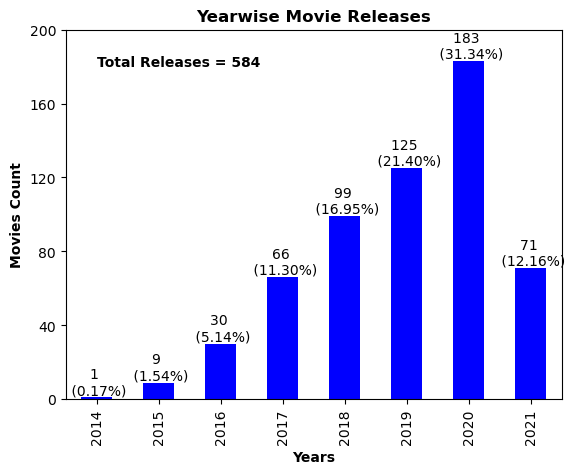

In [8]:
cnts = data1['Year'].value_counts().sort_index()
# plt.figure(figsize=(8,6))  # Adjust width and height as needed
cnts.plot(kind='bar' ,color='b')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Movies Count',fontweight = 'bold')
plt.title('Yearwise Movie Releases',fontweight = 'bold')
plt.yticks([0,40, 80, 120, 160,200])  # Define custom tick values for the y-axis
plt.text(0,180,f'Total Releases = {cnts.sum()}',fontweight = 'bold')
for i, (year, count) in enumerate(cnts.items()):
    percentage = (count / cnts.sum()) * 100
    plt.text(i, count, f"{count} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.show()

Analysis:

1. The given 584 counts of data lies between the years of 2014 to 2021, which are about 8 years.
2. In that, 183 movies, that is 31 % of movies released in 2020 only.

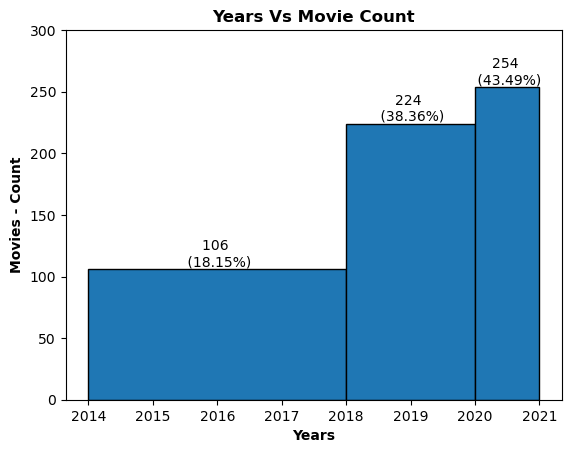

In [9]:
bulk_bins = [2014, 2018,2020,2021]
hist, bin_edges = np.histogram(data1['Year'], bins=bulk_bins)
plt.hist(data1['Year'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(data1['Year'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Movies - Count',fontweight = 'bold')
plt.yticks([0,50,100,150,200,250,300],['0','50','100','150','200','250','300'])
plt.title('Years Vs Movie Count',fontweight = 'bold')
plt.show()

3. 18.15 % of movies are released in 2014 - 2018 
4. 38.36 % of movies have been realeased within 2018 to 2020 years
5. 43.49% movies are released in 2020 - 2021

In [12]:
data1['Language'].value_counts().head(6)

English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Name: Language, dtype: int64

In [30]:
count_dict = data1["Language"].value_counts().to_dict()
count_dict


{'English': 401,
 'Hindi': 33,
 'Spanish': 31,
 'French': 20,
 'Italian': 14,
 'Portuguese': 12,
 'Indonesian': 9,
 'Korean': 6,
 'Japanese': 6,
 'English/Spanish': 6,
 'German': 5,
 'Turkish': 5,
 'Dutch': 3,
 'Polish': 3,
 'Marathi': 3,
 'English/Mandarin': 2,
 'English/Hindi': 2,
 'English/Japanese': 2,
 'Thai': 2,
 'Filipino': 2,
 'Swedish': 1,
 'Khmer/English/French': 1,
 'English/Akan': 1,
 'English/Russian': 1,
 'English/Arabic': 1,
 'English/Korean': 1,
 'Tamil': 1,
 'Malay': 1,
 'Bengali': 1,
 'Norwegian': 1,
 'Georgian': 1,
 'Thia/English': 1,
 'English/Taiwanese/Mandarin': 1,
 'English/Swedish': 1,
 'Spanish/Catalan': 1,
 'Spanish/Basque': 1,
 'English/Ukranian/Russian': 1}

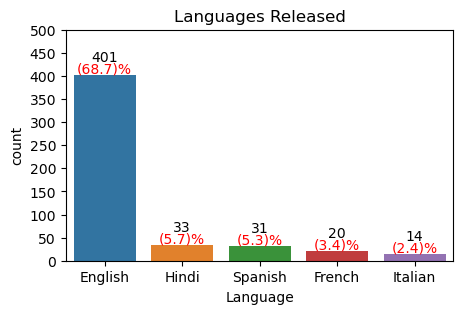

In [71]:
fig, axarr = plt.subplots(1, 1, figsize=(5, 3))
ax=sns.countplot(x ='Language', data = data1,order = data1['Language'].value_counts().head(5).index
);
ax.set_title('Languages Released')
ax.set_yticks([0,50,100,150,200,250,300,350,400,450,500])
for i, p in enumerate(ax.patches):
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()+30), ha='center')
    ax.annotate(f'({percentage:.1f})%', (p.get_x() + p.get_width() / 2., p.get_height()+5), ha='center',color='r')
plt.show()

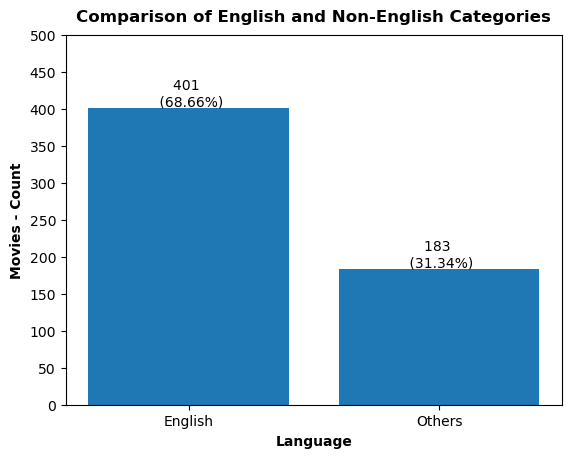

In [16]:
df1=data1.query('Language=="English"')

# df2=data1.query('Language != "English"')
df2=data1['Language'].value_counts().head(6)

# english_count = len(df1)
# non_english_count = len(df2)
# total=english_count+non_english_count
# categories = ['English', 'Others']
# counts = [english_count, non_english_count]

plt.bar(categories, counts)

for i, count in enumerate(counts):
    percentage = (count/total) * 100
    plt.text(categories[i], count,f"{count} \n ({percentage:.2f}%)", ha='center', va='bottom')    

plt.xlabel('Language',fontweight = 'bold')
plt.ylabel('Movies - Count',fontweight = 'bold')
plt.yticks([0,50,100,150,200,250,300,350,400,450,500],['0','50','100','150','200','250','300','350','400','450','500'])
plt.title('Comparison of English and Non-English Categories',fontweight = 'bold',pad=10)
plt.show()


6. 68.6% movies are only in English Language

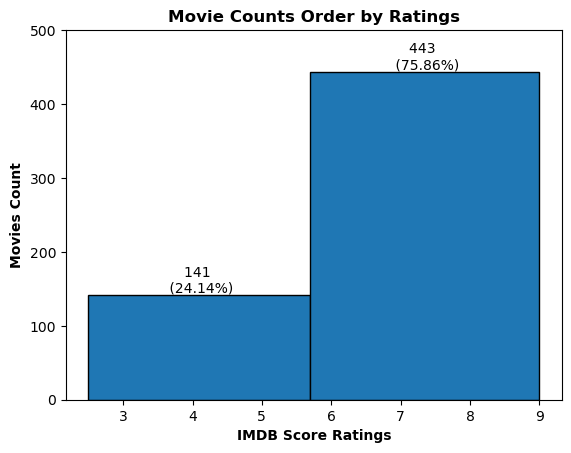

In [17]:
df1=data1.query("IMDB_Score >=2.5 & IMDB_Score <=9.0")
bulk_bins = [2.5, 5.7,9.0]
hist, bin_edges = np.histogram(df1['IMDB_Score'], bins=bulk_bins)
plt.hist(df1['IMDB_Score'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(data1['IMDB_Score'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('IMDB Score Ratings',fontweight = 'bold')
plt.ylabel('Movies Count',fontweight = 'bold')
plt.yticks([0,100,200,300,400,500],['0','100','200','300','400','500'])
plt.title('Movie Counts Order by Ratings',fontweight = 'bold')
plt.show()

7. 25% movies are having IMDB score range as 2.5 to 5.7
8. 75% of movies are having 5.7 to 9 IMDB score

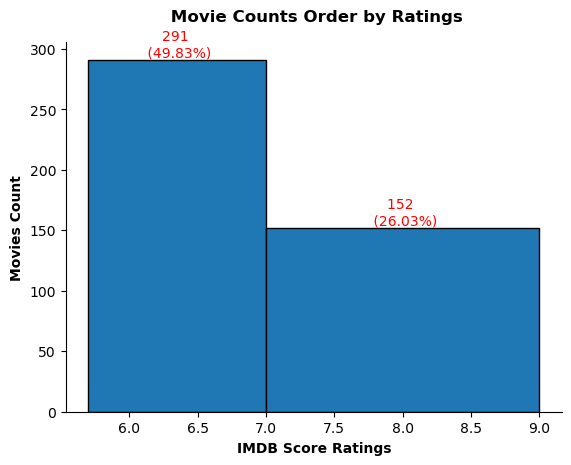

In [18]:
df1=data1.query("IMDB_Score >=2.5 & IMDB_Score <=9.0")
bulk_bins = [5.7,7.0,9.0]
hist, bin_edges = np.histogram(df1['IMDB_Score'], bins=bulk_bins)
plt.hist(df1['IMDB_Score'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(data1['IMDB_Score'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom',color='r')
plt.xlabel('IMDB Score Ratings' ,fontweight = 'bold')
plt.ylabel('Movies Count',fontweight = 'bold')
plt.title(' Movie Counts Order by Ratings' ,fontweight = 'bold',pad=15)
sns.despine()
plt.show()

9. In precise, 50 % are in the range of 5.7 to 7.0 and 26 % movies are 7.0 to 9.0 IMDB score.

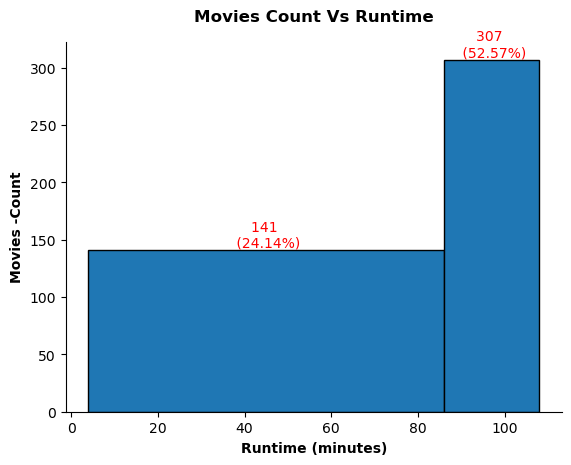

In [19]:
df1=data1.query("Runtime >=4.0 & Runtime <= 209")
bulk_bins = [4,86,108]
hist, bin_edges = np.histogram(df1['Runtime'], bins=bulk_bins)

plt.hist(df1['Runtime'], bins=bulk_bins, edgecolor='k')
plt.xlabel('Runtime (minutes)',fontweight = 'bold')
plt.ylabel('Movies -Count',fontweight = 'bold')
plt.title('Movies Count Vs Runtime',pad=15,fontweight = 'bold')

for i in range(len(hist)):
    percentage = (hist[i] / len(data1['Runtime'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom',color='r')
sns.despine()
plt.show()

8. 25% movies are running with in the range of 4.0 minutes to 1 hr 26 minutes.
9. 50% movies runtime falls in the range of 1 hr 26 min to 1.hr 48 minutes


In [20]:
df1=data1.query('Runtime ==4.0 | Runtime==209')
df1


,Title,Genre,Premiere,Runtime,IMDB_Score,Language,Year,Month,genre_v2
40,Sol Levante,Anime / Short,"April 2, 2020",4,4.7,English,2020,April 2,anime / short
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,2019,November 27,crime drama


0 4
1 209


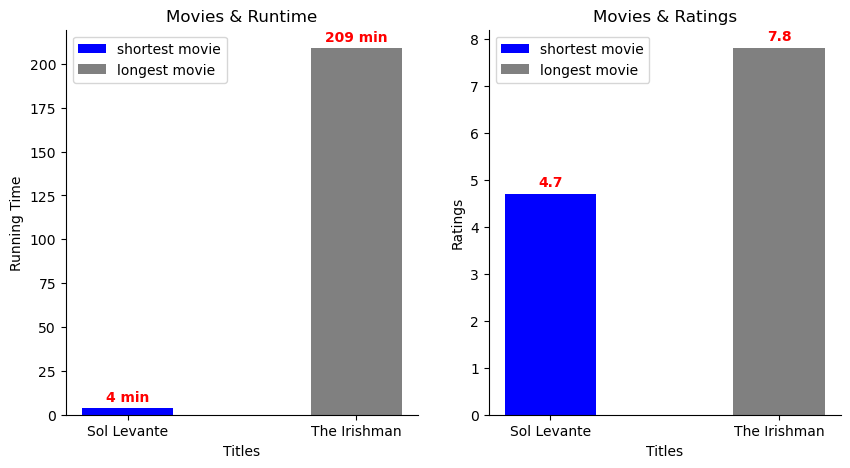

In [21]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
df1=data1.query('Runtime ==4.0 ')
df2=data1.query('Runtime ==209 ')

val=data1['Runtime'].min(),data1['Runtime'].max()
rval=df1['IMDB_Score'].min(),df2['IMDB_Score'].max()

axarr[0].bar(df1['Title'], df1['Runtime'], color="blue",label="shortest movie",width=0.4)
axarr[0].bar(df2['Title'], df2['Runtime'], color="grey",label="longest movie",width=0.4)
axarr[0].set_title('Movies & Runtime')
axarr[0].legend(loc=2)
axarr[0].set_xlabel('Titles')
axarr[0].set_ylabel('Running Time')
for i, v in enumerate(val):
    print(i,v)
    axarr[0].text(i,v+2, str(v)+' min' , color = 'red', fontweight = 'bold',ha='center', va='bottom')

axarr[1].bar(df1['Title'], df1['IMDB_Score'],color="blue",label='shortest movie',width=0.4)
axarr[1].bar(df2['Title'], df2['IMDB_Score'],color="grey",label='longest movie',width=0.4)
axarr[1].set_title('Movies & Ratings')
axarr[1].legend(loc=2)
axarr[1].set_xlabel('Titles')
axarr[1].set_ylabel('Ratings')
for i, v in enumerate(rval):
    axarr[1].text(i,v+.1, str(v) , color = 'red', fontweight = 'bold',ha='center', va='bottom')
sns.despine()
plt.show()

10. The shortest movie run time is 4.0 minute. It is, 'Sol Levante' , the English Anime / Short movie and 
   it scores 4.7 which is below average
11. The longest movie runtime is 3 hrs 29 min. It is 'The Irishman' English movie,Crime Drama  which 
    scores 7.8 


0 58
1 83


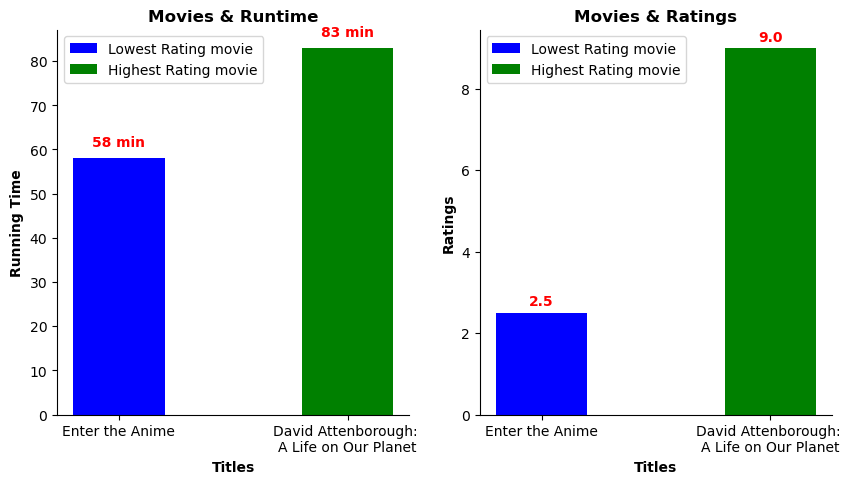

In [22]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
df1=data1.query('IMDB_Score== IMDB_Score.min()')
df2=data1.query('IMDB_Score== IMDB_Score.max()')
t=data1.query('IMDB_Score== IMDB_Score.min() | IMDB_Score== IMDB_Score.max()')

val=t['Runtime'].min(),t['Runtime'].max()
rval=t['IMDB_Score'].min(),t['IMDB_Score'].max()

axarr[0].bar(df1['Title'], df1['Runtime'], color="blue",label="Lowest Rating movie",width=0.4)
axarr[0].bar(df2['Title'], df2['Runtime'], color="green",label="Highest Rating movie",width=0.4)
axarr[0].set_title('Movies & Runtime',fontweight='bold')
axarr[0].legend(loc=2)
TitleList= [title[:20] + '\n' + title[20:] if len(title) > 20 else title for title in t['Title']]
axarr[0].set_xticklabels(TitleList,rotation=0)
axarr[1].set_xticklabels(TitleList,rotation=0)
axarr[0].set_xlabel('Titles' ,fontweight='bold')
axarr[0].set_ylabel('Running Time',fontweight='bold')
for i, v in enumerate(val):
    print(i,v)
    axarr[0].text(i,v+2, str(v)+' min' , color = 'red', fontweight = 'bold',ha='center', va='bottom')

axarr[1].bar(df1['Title'], df1['IMDB_Score'],color="blue",label='Lowest Rating movie', width=0.4)
axarr[1].bar(df2['Title'], df2['IMDB_Score'],color="green",label='Highest Rating movie',width=0.4)
axarr[1].set_title('Movies & Ratings' , fontweight='bold')
axarr[1].legend(loc=2)
axarr[1].set_xlabel('Titles' ,fontweight='bold')
axarr[1].set_ylabel('Ratings',fontweight='bold')
for i, v in enumerate(rval):
    axarr[1].text(i,v+.1, str(v) , color = 'red', fontweight = 'bold',ha='center', va='bottom')
sns.despine()
plt.show()

12. The lowest scored (2.5) movie is 'Enter the Anime' -(English/Japanese) Documentary Genre runs for 58 min
13. The Highest scored(9.0) movie is 'David Attenborough: A Life on Our Planet', English-Documentary 
    run for 1 hr 23 min

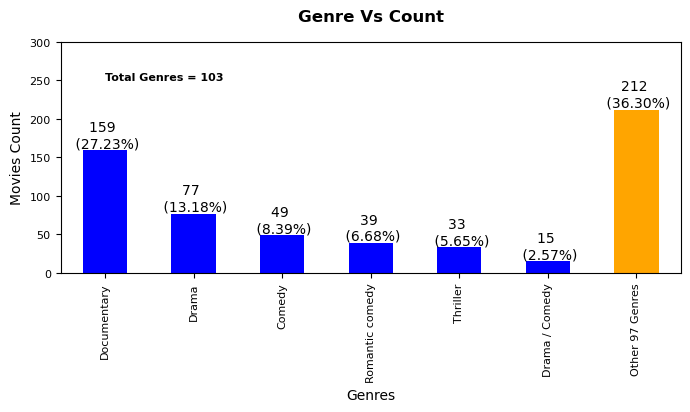

In [23]:
fig, axarr = plt.subplots(1, 1, figsize=(8, 3))
High_prior_genres=['Documentary','Drama','Comedy','Romantic comedy','Thriller','Drama / Comedy']
exclude_high_prior = data1[~data1['Genre'].isin(High_prior_genres)]
low_prior_genres=exclude_high_prior['Genre'].nunique()
total_genres=data1['Genre'].nunique()
low_prior_genres, total_genres
data_count=data1['Genre'].shape[0]
low_prior_count=exclude_high_prior['Genre'].shape[0]
high_prior_count=data_count-low_prior_count
low_prior_genres,len(High_prior_genres), total_genres,low_prior_count,high_prior_count,data_count
new_label= 'Other+f"{low_prior_genres} "+ Genres'

df=data1['Genre'].value_counts().head(6)
df['Other 97 Genres']=low_prior_count
plt.text(0,250,f'Total Genres = {total_genres}',fontsize=8,fontweight = 'bold')

bars=df.plot.bar(ax=axarr, fontsize=8,color='b')
bars.patches[-1].set_facecolor('orange')
axarr.set_xlabel('Genres')
axarr.set_ylabel('Movies Count')
axarr.set_yticks([0,50,100,150,200,250,300])
axarr.set_yticklabels(['0','50','100','150','200','250','300'])
axarr.set_title("Genre Vs Count", fontsize=12 ,fontweight='bold',pad=15)
for i, p in enumerate(list(df)):
        percentage=(p/data_count)*100
        plt.text(i, p, f"{p} \n ({percentage:.2f}%)", ha='center', va='bottom')

plt.show()

14. The 27% movies are in Documentary Category while 13% are in Drama Genres. Comedy and Romantic Comedy 
    movies take part in 8% and 6.6% respectively. 5.6% movies are in Thriller category . Apart from above 6 
    genres 39% movies are sharing 97 categories for example horror,family film,musical, Anime,Science 
    Fiction,Super Natural Drama, etc.

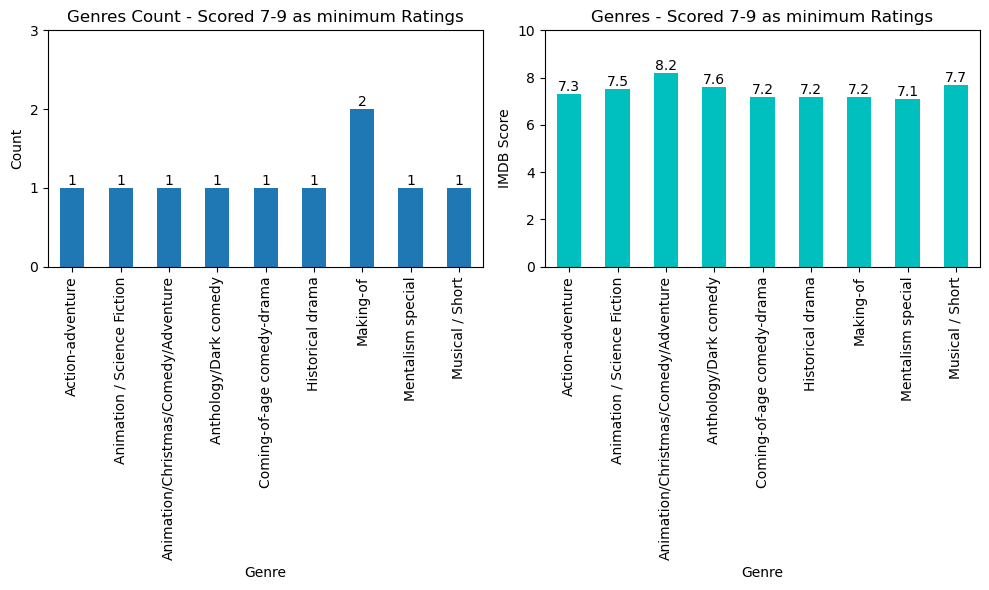

In [24]:
# df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_min','min'), ('_max','max')],'Runtime':[('_min','min'),('_max','max')]})
df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_min','min')],'Runtime':[('_min','min')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1

df2=df1.query('I__min > 7.0 and I__min <= 9.0')
df2

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

df2.plot.bar(x='Genre', y='G__cnt', ax=axes[0])
axes[0].set_title("Genres Count - Scored 7-9 as minimum Ratings")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Count")
axes[0].set_yticks([0,1,2,3])

axes[0].tick_params(axis='x', rotation=90)
axes[0].legend().set_visible(False)  
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

df2.plot.bar(x='Genre', y='I__min', color='c',ax=axes[1])
axes[1].set_title("Genres - Scored 7-9 as minimum Ratings")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("IMDB Score")
axes[1].set_yticks([0,2,4,6,8,10])
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend().set_visible(False) 
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.tight_layout()
plt.show()




15.Below are 10 Genres, only one per category released, but scores between 7 - 9 IMDB scores,which is quite high.. Their Genres are :

Action-adventure	1	7.3	7.3	121	121
Animation / Science Fiction	1	7.5	7.5	71	71
Animation/Christmas/Comedy/Adventure	1	8.2	8.2	97	97
Anthology/Dark comedy	1	7.6	7.6	149	149
Christmas/Fantasy/Adventure/Comedy	1	7.0	7.0	104	104
Coming-of-age comedy-drama	1	7.2	7.2	99	99
Historical drama	1	7.2	7.2	140	140
Making-of	2	7.2	7.7	13	72
Mentalism special	1	7.1	7.1	49	49
Musical / Short	1	7.7	7.7	15	15


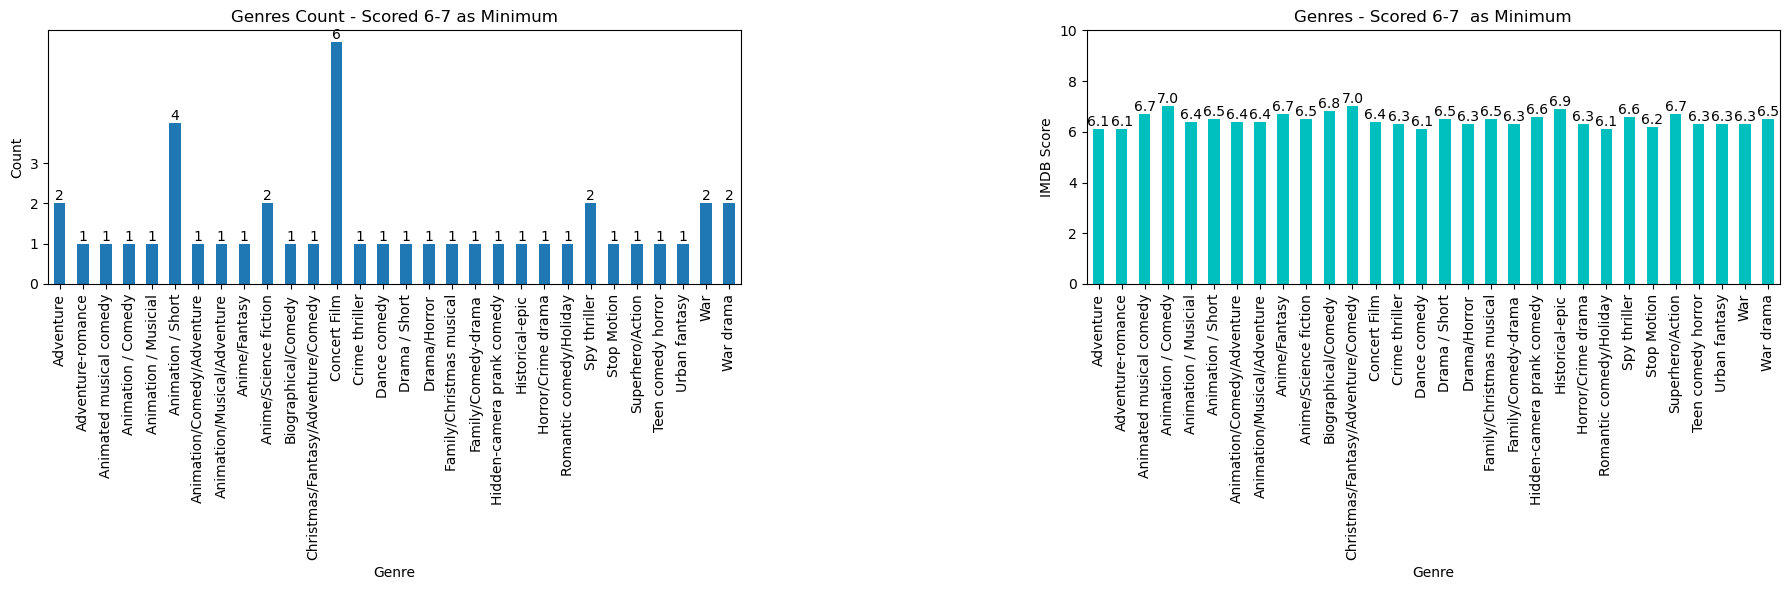

In [25]:
df2=df1.query('I__min > 6.0 and I__min <= 7.0')
df2

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

df2.plot.bar(x='Genre', y='G__cnt', ax=axes[0])
axes[0].set_title("Genres Count - Scored 6-7 as Minimum")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Count")
axes[0].set_yticks([0,1,2,3])

axes[0].tick_params(axis='x', rotation=90)
axes[0].legend().set_visible(False)  
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

df2.plot.bar(x='Genre', y='I__min', color='c',ax=axes[1])
axes[1].set_title("Genres - Scored 6-7  as Minimum")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("IMDB Score")
axes[1].set_yticks([0,2,4,6,8,10])
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend().set_visible(False)  # Hide the legend
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

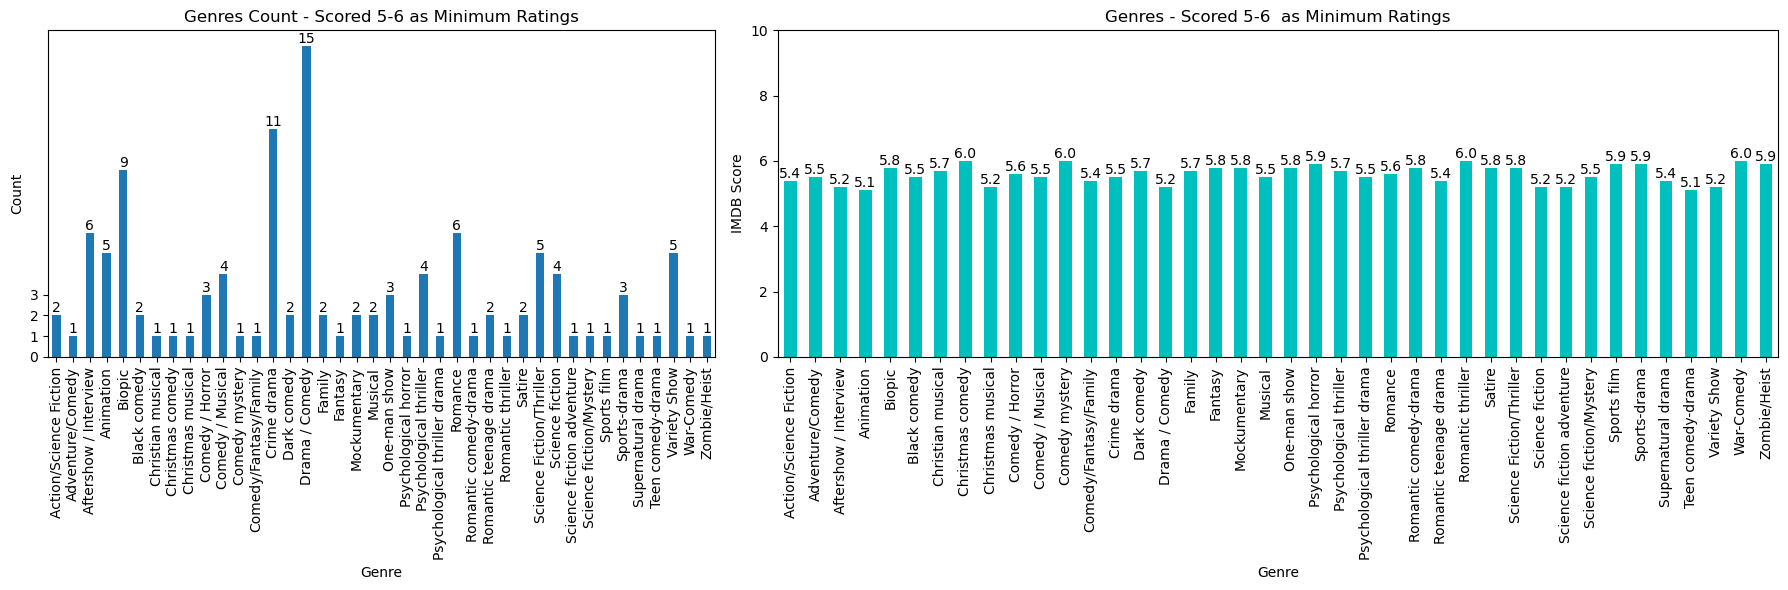

In [26]:
df2=df1.query('I__min > 5.0 and I__min <= 6.0')
df2

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

spec = gridspec.GridSpec(1, 2, width_ratios=[2, 3])

axes[0] = plt.subplot(spec[0])

df2.plot.bar(x='Genre', y='G__cnt', ax=axes[0])
axes[0].set_title("Genres Count - Scored 5-6 as Minimum Ratings")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Count")
axes[0].set_yticks([0,1,2,3])

axes[0].tick_params(axis='x', rotation=90)
axes[0].legend().set_visible(False)  
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
axes[1] = plt.subplot(spec[1])

df2.plot.bar(x='Genre', y='I__min', color='c',ax=axes[1])
axes[1].set_title("Genres - Scored 5-6  as Minimum Ratings")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("IMDB Score")
axes[1].set_yticks([0,2,4,6,8,10])
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend().set_visible(False)  # Hide the legend
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.tight_layout()
plt.show()

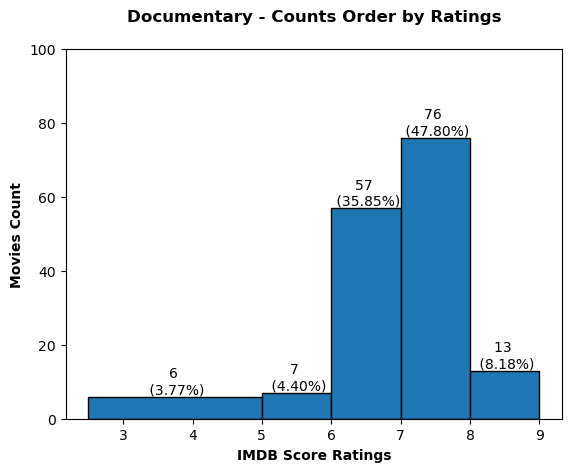

In [27]:
df2=data1.query('(Genre=="Documentary") ')
bulk_bins = [2.5,5,6,7,8,9]
hist, bin_edges = np.histogram(df2['IMDB_Score'], bins=bulk_bins)
plt.hist(df2['IMDB_Score'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(df2['IMDB_Score'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('IMDB Score Ratings',fontweight = 'bold')
plt.ylabel('Movies Count',fontweight = 'bold')
plt.yticks([0,20,40,60,80,100],['0','20','40','60','80','100'])
plt.title('Documentary - Counts Order by Ratings',fontweight = 'bold',pad=20)
plt.show()

18. 96% Documentary movies are scoring 5-9 IMDB scores,means it goes well in public. 
    4% are ONLY below 5 points.
    In that, 42% scores 6-7 points.48% scores 7-8 points.8% are 8-9 points. only 2% shares 5-6 points
    It predicts that Documentary movies are generally accepted a grand welcome from the public.

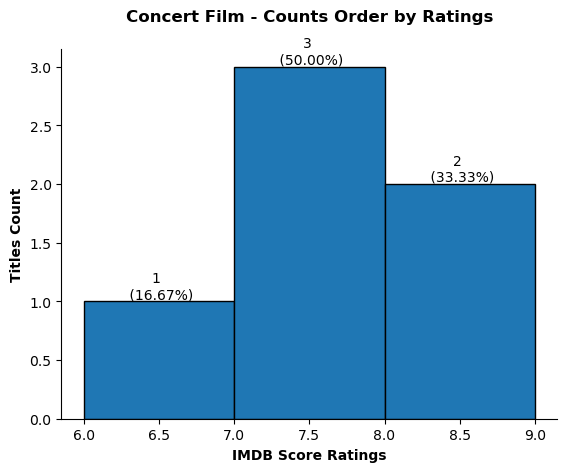

In [28]:
df2=data1.query('(Genre=="Concert Film") ')
bulk_bins = [6,7,8,9]
hist, bin_edges = np.histogram(df2['IMDB_Score'], bins=bulk_bins)
plt.hist(df2['IMDB_Score'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(df2['IMDB_Score'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('IMDB Score Ratings',fontweight = 'bold')
plt.ylabel('Titles Count',fontweight = 'bold')
# plt.yticks([0,50,100,150,200],['0','50','100','150','200'])
plt.title('Concert Film - Counts Order by Ratings',fontweight = 'bold',pad=20)
sns.despine()
plt.show()

19. Concert Films also receives some significant scores.  Because, 3/6 scores 7.2 and above. 2/6 scores 8.2 -8.4. 
    Another 1/6 only has 6.4 points.
    We can say that all Concert Films have been received an overwhelming support among the people